#Step 0 - Setup the learning environment

To begin, we import some library modules and functions that we will use.   

Numpy is a collection of math functions including various matrix operations - see http://www.numpy.org/.   Matplotlib is a 2D plotting library  - see https://matplotlib.org/.

In [101]:
"""
mlp_bp_ann.py

Backpropagation tutorial using a two layer ANN, without
the aid of additional NN libraries. 
This two-layer ANN has one layer of hidden nodes that allows the model to develop
non-linear functions

The program uses  Numpy for faster matrix operations and 
Matplotlib for plotting the training error per epoch

"""

from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from warnings import simplefilter
simplefilter(action='ignore')

print("The environment is ready.")

The environment is ready.


### Reading the Dataset

In [102]:
df = pd.read_csv('RealEstateLabelled.csv',header=0)
df

,DWLUN,RDOS,YRBLT,TOTFIXT,HEATING,WBFPSTK,BMNTGAR,ATTFRGAR,TOTLIVAR,DECKOFP,ENCLPOR,NBHDGRP,RECROOM,FINBSMT,GRADE,CDU,TOTOBY,SALEPRIC
0,1,21,1900,5,2,no,0,0,1098,58,0,2,0,0,0.92,5,0,103000
1,2,0,1900,10,2,no,0,0,2112,232,72,1,0,0,1.08,4,0,162000
2,1,1,1959,7,2,no,0,0,1110,20,77,1,288,0,1.00,4,420,160500
3,2,19,1910,10,2,no,0,0,1634,120,98,1,0,0,1.08,4,5530,170000
4,1,10,1900,8,2,no,0,0,1808,0,0,1,0,0,1.00,4,0,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1,15,1955,7,2,yes,0,0,1290,72,174,1,216,0,1.08,4,13020,160500
186,1,17,1900,5,2,no,0,0,1886,24,84,1,0,0,1.00,4,3250,175000
187,2,19,1930,12,2,no,0,0,2300,346,0,1,0,0,1.00,4,0,200000
188,3,20,1885,15,2,no,0,0,2936,247,184,1,0,0,1.08,4,0,236000


In [103]:
df.WBFPSTK

0       no
1       no
2       no
3       no
4       no
      ... 
185    yes
186     no
187     no
188     no
189     no
Name: WBFPSTK, Length: 190, dtype: object

In [104]:
length_wood = len(df.WBFPSTK)

for y in range(length_wood):
        if df.WBFPSTK[y] == 'yes':
             df.WBFPSTK[y] = 1
        else: 
             df.WBFPSTK[y] = 0
        
print(df.WBFPSTK) 
print(df)

0      0
1      0
2      0
3      0
4      0
      ..
185    1
186    0
187    0
188    0
189    0
Name: WBFPSTK, Length: 190, dtype: object
     DWLUN  RDOS  YRBLT  TOTFIXT  HEATING WBFPSTK  BMNTGAR  ATTFRGAR  \
0        1    21   1900        5        2       0        0         0   
1        2     0   1900       10        2       0        0         0   
2        1     1   1959        7        2       0        0         0   
3        2    19   1910       10        2       0        0         0   
4        1    10   1900        8        2       0        0         0   
..     ...   ...    ...      ...      ...     ...      ...       ...   
185      1    15   1955        7        2       1        0         0   
186      1    17   1900        5        2       0        0         0   
187      2    19   1930       12        2       0        0         0   
188      3    20   1885       15        2       0        0         0   
189      1    17   1967        7        2       0        0         

In [105]:
RealEstate = df.values

In [106]:
RealEstate

array([[1, 21, 1900, ..., 5, 0, 103000],
       [2, 0, 1900, ..., 4, 0, 162000],
       [1, 1, 1959, ..., 4, 420, 160500],
       ...,
       [2, 19, 1930, ..., 4, 0, 200000],
       [3, 20, 1885, ..., 4, 0, 236000],
       [1, 17, 1967, ..., 4, 2770, 155000]], dtype=object)

In [107]:
data_in = RealEstate[:,0:17]

In [108]:
target = RealEstate[:,17] 

In [109]:
data_in

array([[1, 21, 1900, ..., 0.92, 5, 0],
       [2, 0, 1900, ..., 1.08, 4, 0],
       [1, 1, 1959, ..., 1.0, 4, 420],
       ...,
       [2, 19, 1930, ..., 1.0, 4, 0],
       [3, 20, 1885, ..., 1.08, 4, 0],
       [1, 17, 1967, ..., 1.08, 4, 2770]], dtype=object)

In [110]:
target

array([103000, 162000, 160500, 170000, 170000, 145000, 182000, 165000,
       240000, 160000, 154000, 151000, 161000, 220000, 202500, 137000,
       135000, 198000, 175000, 160000, 200000, 158000, 125000, 170000,
       205000, 155000, 145000, 250000, 155000, 128000, 128800, 175000,
       170000, 155000, 135000, 180000, 190000, 170000, 205000, 160000,
       178000, 140000, 172000, 175000, 132000, 160000, 136000, 155000,
       155000, 153000, 180000, 139900, 205000, 146000, 146000, 147000,
       155000, 160000, 162000, 175000, 180000, 178000, 130000, 195000,
       185000, 130000, 185000, 162500, 117500, 202500, 150000, 160000,
       145000, 145575, 179900, 142000, 165000, 180000, 212500, 145000,
       140000, 165000, 165000, 165000, 142000, 125000, 157000, 155000,
       166000, 162500, 215000, 170000, 160000, 120000, 206750, 177000,
       172000, 155000, 160000, 155000, 190000, 180000, 173000, 150800,
       125000, 134000, 220000, 140000, 172000, 166666, 206000, 140000,
      

### Converting the target variable into binary variable

In [111]:
length = len(target)

for x in range(length):
    if target[x] >= 170000:
        target[x] = 1
    else: 
        target[x] = 0
        
target = np.array(target, dtype='int32')
print(target)  

[0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1
 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 1 0]


In [112]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_in = min_max_scaler.fit_transform(data_in)

### Splitting the Dataset

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(data_in, target, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(133, 17) (28, 17) (29, 17) (133,) (28,) (29,)


In [114]:
X_train

array([[1.        , 0.7826087 , 0.36764706, ..., 0.65217391, 0.5       ,
        0.        ],
       [0.        , 0.26086957, 0.36764706, ..., 1.        , 1.        ,
        0.        ],
       [0.5       , 0.08695652, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.39130435, 0.36764706, ..., 0.65217391, 0.5       ,
        0.        ],
       [0.        , 0.47826087, 0.36764706, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.56521739, 0.82352941, ..., 1.        , 0.        ,
        0.        ]])

In [115]:
Z = np.array([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]])

In [116]:
Z.shape

(133, 1)

In [117]:
X_train = (np.column_stack((Z,X_train)))
X_train

array([[1.        , 1.        , 0.7826087 , ..., 0.65217391, 0.5       ,
        0.        ],
       [1.        , 0.        , 0.26086957, ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.5       , 0.08695652, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.39130435, ..., 0.65217391, 0.5       ,
        0.        ],
       [1.        , 0.        , 0.47826087, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.56521739, ..., 1.        , 0.        ,
        0.        ]])

In [118]:
X_train.shape

(133, 18)

In [119]:
Y_train

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0])

### Training the model using training data partition

In [120]:
# Set the learing parameters
learning_rate = 0.01
momemtum = 0.5
num_epochs = 20000
min_val_loss = np.inf

# Set the dimensions of the input, hidden, and output layers
size_in = 17
size_hidden = 100  # Can be anything - larger will take longer
size_out = target.ndim

# Set the seed value of the random number generator
random_seed = 2
np.random.seed(random_seed)

# Initialize the network weights, and place to store previous epoch weights
weight_out = np.random.rand(size_out, size_hidden + 1) - 0.5
weight_hidden = np.random.rand(size_hidden, size_in + 1) - 0.5

weight_hidden_prev = np.zeros(weight_hidden.shape)
weight_out_prev = np.zeros(weight_out.shape)

weight_hidden_val = np.zeros(weight_hidden.shape)
weight_out_val = np.zeros(weight_out.shape)

# Initialize a vector to store the train errors for each epoch
error_log = np.zeros([num_epochs])
errorv_log = np.zeros([num_epochs])

print("Outout node initial weights:")
print(weight_out)
print("Hidden node initial weights:")
print(weight_hidden)

Outout node initial weights:
[[-6.40050979e-02 -4.74073768e-01  4.96624779e-02 -6.46776074e-02
  -7.96321979e-02 -1.69665179e-01 -2.95351366e-01  1.19270966e-01
  -2.00345326e-01 -2.33172725e-01  1.21133833e-01  2.91420943e-02
  -3.65420055e-01  1.35781213e-02 -3.15560134e-01  2.85335148e-01
   3.53975293e-01 -5.76316262e-03  3.46561485e-01 -4.20354523e-01
   5.24609012e-03 -4.34713496e-01 -7.18776724e-02 -4.03469084e-01
  -3.72840028e-01  9.67453090e-02 -2.73987999e-01 -3.93054316e-01
  -2.79693793e-01 -1.50173715e-01 -3.22125154e-02 -2.98256774e-01
   1.40406725e-01 -1.69301644e-02  5.23672002e-03 -1.13107349e-01
   2.93637454e-01  8.00041789e-02 -3.37701401e-01  2.00752347e-01
   4.64551080e-01  8.36117022e-06  3.89520064e-01 -1.58386347e-01
   6.71441276e-02 -7.24540367e-02 -6.32527370e-02  2.76559185e-01
   3.56041735e-02  4.53742227e-01  4.42081601e-02 -4.17905078e-01
  -1.33657598e-01  3.50850504e-01 -9.37249570e-02 -4.72797634e-01
  -2.52822761e-01 -4.32855629e-01  4.93852011e-

In [121]:
weight_hidden.shape

(100, 18)

In [122]:
X_train.shape

(133, 18)

In [123]:
data_in = X_train.T

In [124]:
data_in.shape

(18, 133)

In [125]:
target = Y_train
target

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0])

In [126]:
target.shape

(133,)

In [127]:
Z_val= np.array([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]])

In [128]:
X_val = (np.column_stack((Z_val,X_val)))

In [129]:
X_val.shape

(28, 18)

In [130]:
X_val = X_val.T

In [131]:
Y_val

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1])

In [132]:
for i in range(0, num_epochs):

    # Compute the predicted output for the hidden layer, then adding bias
    predicted_h = 1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))
    predicted_h = np.concatenate((np.ones([1, data_in.shape[1]]), predicted_h), axis=0)
    
    # Compute the output of network
    predicted_out = 1 / (1 + np.exp(np.dot(-weight_out, predicted_h)))
    # print(predicted_out)
    # Compute the derivatives for the weight updates
    deriv_out = (predicted_out * (1 - predicted_out)) * (target - predicted_out)
    deriv_h = (predicted_h * (1 - predicted_h)) * (weight_out.T * deriv_out)

    # Compute the update to the input to hidden node weights
    deriv_weight_h = learning_rate * np.dot(
        data_in, deriv_h[1:].T).T + momemtum * weight_hidden_prev
    weight_hidden = weight_hidden + deriv_weight_h
    weight_hidden_prev = deriv_weight_h
    
    # Compute the update to the hidden to output node weights
    deriv_weight_out = learning_rate * np.dot(predicted_h, deriv_out.T).T 
    deriv_weight_out = deriv_weight_out + momemtum * weight_out_prev #add momentum
    weight_out = weight_out + deriv_weight_out 
    weight_out_prev = deriv_weight_out

    # Compute the error (loss) of the network for this epoch  #Change the data_in.shape[1] to X_val and X_test[1] for testing and validation set error 
    predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, np.concatenate(
        (np.ones([1, data_in.shape[1]]), (1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))))))))
    error_log[i] = 0.5 * ((predicted_out_err - target) ** 2).mean(axis=None)
    
    predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, np.concatenate(
        (np.ones([1, X_val.shape[1]]), (1 / (1 + np.exp(np.dot(-weight_hidden, X_val)))))))))
    errorv_log[i] = 0.5 * ((predicted_out_err - Y_val) ** 2).mean(axis=None) 
    if errorv_log[i] < min_val_loss:
        min_val_loss = errorv_log[i]
        weight_hidden_val = weight_hidden
        weight_out_val = weight_out
    if (i % 50) == 0:
        # print('XOR bias momentum MSE: {0}'.format(error_log[i]))
        print("Iter: %d, Training MSE: %8.7f" % (i, error_log[i]))
        print("Iter: %d, Validation MSE: %8.7f" % (i, errorv_log[i]))

Iter: 0, Training MSE: 0.1489739
Iter: 0, Validation MSE: 0.0966812
Iter: 50, Training MSE: 0.0539326
Iter: 50, Validation MSE: 0.0367307
Iter: 100, Training MSE: 0.0468385
Iter: 100, Validation MSE: 0.0291946
Iter: 150, Training MSE: 0.0438693
Iter: 150, Validation MSE: 0.0270832
Iter: 200, Training MSE: 0.0418978
Iter: 200, Validation MSE: 0.0264756
Iter: 250, Training MSE: 0.0403502
Iter: 250, Validation MSE: 0.0266521
Iter: 300, Training MSE: 0.0390482
Iter: 300, Validation MSE: 0.0273884
Iter: 350, Training MSE: 0.0379207
Iter: 350, Validation MSE: 0.0285374
Iter: 400, Training MSE: 0.0369312
Iter: 400, Validation MSE: 0.0299447
Iter: 450, Training MSE: 0.0360550
Iter: 450, Validation MSE: 0.0314592
Iter: 500, Training MSE: 0.0352739
Iter: 500, Validation MSE: 0.0329582
Iter: 550, Training MSE: 0.0345742
Iter: 550, Validation MSE: 0.0343579
Iter: 600, Training MSE: 0.0339455
Iter: 600, Validation MSE: 0.0356119
Iter: 650, Training MSE: 0.0333795
Iter: 650, Validation MSE: 0.036703

Iter: 5900, Training MSE: 0.0233678
Iter: 5900, Validation MSE: 0.0455234
Iter: 5950, Training MSE: 0.0233242
Iter: 5950, Validation MSE: 0.0455049
Iter: 6000, Training MSE: 0.0232805
Iter: 6000, Validation MSE: 0.0454865
Iter: 6050, Training MSE: 0.0232365
Iter: 6050, Validation MSE: 0.0454681
Iter: 6100, Training MSE: 0.0231923
Iter: 6100, Validation MSE: 0.0454496
Iter: 6150, Training MSE: 0.0231479
Iter: 6150, Validation MSE: 0.0454312
Iter: 6200, Training MSE: 0.0231032
Iter: 6200, Validation MSE: 0.0454127
Iter: 6250, Training MSE: 0.0230583
Iter: 6250, Validation MSE: 0.0453942
Iter: 6300, Training MSE: 0.0230131
Iter: 6300, Validation MSE: 0.0453757
Iter: 6350, Training MSE: 0.0229677
Iter: 6350, Validation MSE: 0.0453572
Iter: 6400, Training MSE: 0.0229220
Iter: 6400, Validation MSE: 0.0453387
Iter: 6450, Training MSE: 0.0228760
Iter: 6450, Validation MSE: 0.0453201
Iter: 6500, Training MSE: 0.0228298
Iter: 6500, Validation MSE: 0.0453016
Iter: 6550, Training MSE: 0.0227833
It

Iter: 11800, Training MSE: 0.0174433
Iter: 11800, Validation MSE: 0.0435905
Iter: 11850, Training MSE: 0.0174107
Iter: 11850, Validation MSE: 0.0435797
Iter: 11900, Training MSE: 0.0173787
Iter: 11900, Validation MSE: 0.0435690
Iter: 11950, Training MSE: 0.0173472
Iter: 11950, Validation MSE: 0.0435585
Iter: 12000, Training MSE: 0.0173162
Iter: 12000, Validation MSE: 0.0435481
Iter: 12050, Training MSE: 0.0172857
Iter: 12050, Validation MSE: 0.0435379
Iter: 12100, Training MSE: 0.0172556
Iter: 12100, Validation MSE: 0.0435279
Iter: 12150, Training MSE: 0.0172261
Iter: 12150, Validation MSE: 0.0435180
Iter: 12200, Training MSE: 0.0171970
Iter: 12200, Validation MSE: 0.0435082
Iter: 12250, Training MSE: 0.0171684
Iter: 12250, Validation MSE: 0.0434986
Iter: 12300, Training MSE: 0.0171402
Iter: 12300, Validation MSE: 0.0434892
Iter: 12350, Training MSE: 0.0171125
Iter: 12350, Validation MSE: 0.0434799
Iter: 12400, Training MSE: 0.0170852
Iter: 12400, Validation MSE: 0.0434707
Iter: 12450,

Iter: 17550, Training MSE: 0.0157163
Iter: 17550, Validation MSE: 0.0431612
Iter: 17600, Training MSE: 0.0157106
Iter: 17600, Validation MSE: 0.0431646
Iter: 17650, Training MSE: 0.0157050
Iter: 17650, Validation MSE: 0.0431681
Iter: 17700, Training MSE: 0.0156994
Iter: 17700, Validation MSE: 0.0431718
Iter: 17750, Training MSE: 0.0156939
Iter: 17750, Validation MSE: 0.0431756
Iter: 17800, Training MSE: 0.0156884
Iter: 17800, Validation MSE: 0.0431796
Iter: 17850, Training MSE: 0.0156831
Iter: 17850, Validation MSE: 0.0431837
Iter: 17900, Training MSE: 0.0156778
Iter: 17900, Validation MSE: 0.0431880
Iter: 17950, Training MSE: 0.0156725
Iter: 17950, Validation MSE: 0.0431924
Iter: 18000, Training MSE: 0.0156673
Iter: 18000, Validation MSE: 0.0431970
Iter: 18050, Training MSE: 0.0156622
Iter: 18050, Validation MSE: 0.0432017
Iter: 18100, Training MSE: 0.0156571
Iter: 18100, Validation MSE: 0.0432066
Iter: 18150, Training MSE: 0.0156521
Iter: 18150, Validation MSE: 0.0432117
Iter: 18200,

### Finding out the minimum validation MSE and storing the corresponding weights


In [133]:
minimum = min(errorv_log)
i =np.where(errorv_log == minimum)
print(minimum,"Iter:%d" % i)

0.026457912487354303 Iter:211


In [134]:
weight_out = weight_out_val
weight_hidden = weight_hidden_val

In [135]:
weight_out

array([[-3.40373190e-02, -3.71316657e-01, -2.06344484e-01,
        -6.31892832e-01, -4.16405182e-01,  1.94646210e-01,
        -1.73555858e-01,  7.08601510e-01,  4.16167330e-01,
         1.44545993e-01,  1.45752548e-02,  5.22391091e-01,
        -1.02530372e+00, -3.15832856e-01, -6.00743705e-01,
         7.43084010e-01,  6.49546156e-01, -5.32857084e-01,
         4.02761691e-01,  4.61300967e-03, -3.22853300e-02,
        -1.43000026e-01, -9.33601686e-02, -8.42021764e-01,
        -5.03505986e-01, -2.16864572e-01, -8.40438144e-01,
        -5.14856097e-01, -4.15620956e-04, -9.54460376e-01,
        -4.37565247e-01, -1.87748942e-01,  3.56742348e-01,
        -8.35281510e-02, -5.69317008e-01,  3.54687762e-01,
         7.81864269e-01,  6.83999749e-01, -3.99256806e-01,
        -1.64673470e-01,  7.88706693e-01, -2.16476648e-01,
         1.63152830e-01, -2.28659045e-01, -4.28012954e-01,
        -1.25277453e-01,  3.53523638e-01,  2.07585086e-01,
         4.71083397e-01,  1.09016537e+00, -2.09229518e-0

In [136]:
weight_hidden

array([[-0.37441197,  0.15046796,  0.18892919, ...,  0.06365076,
        -0.27877965,  0.01478299],
       [-0.00577391,  0.03896966,  0.18488312, ..., -0.0343521 ,
         0.06644235,  0.31994041],
       [ 0.50392259, -0.57773425, -0.32850043, ..., -0.17809873,
         0.15743577, -0.54068707],
       ...,
       [ 0.09997225,  0.04982138,  0.30411283, ..., -0.29794397,
         0.04741357, -0.38150526],
       [-0.15567135,  0.03484058, -0.05752257, ..., -0.06631286,
        -0.00337356, -0.20600603],
       [-0.25236842, -0.2669241 ,  0.08639636, ..., -0.35396957,
         0.32418162,  0.0169252 ]])

### Evaluate the model on the training set and print the results.
And then plot the training error for each epoch through the data.

Target outputs: [1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0]
Predicted outputs: [[1.00000000e+00 2.77619375e-11 9.99995630e-01 3.34251675e-12
  9.99998669e-01 9.99983224e-01 9.99977792e-01 8.45044117e-03
  1.53363766e-06 1.63644698e-04 1.00000000e+00 9.94753863e-11
  1.00086818e-07 2.77237369e-06 1.33572023e-05 1.14421309e-01
  7.00085818e-06 9.21248111e-01 9.47793035e-03 4.99100109e-10
  1.08844725e-01 2.22277389e-07 2.43642744e-03 9.99414174e-01
  9.97435843e-01 9.43921847e-01 6.39310840e-02 1.94360969e-03
  8.30452391e-05 9.85442035e-07 2.74998697e-12 9.93099100e-02
  7.43136867e-10 2.44062428e-06 1.18787400e-13 9.99999996e-01
  6.98785905e-07 9.41762162e-05 8.88220942e-01 8.84228679e-01
  9.51632528e-01 2.29474863e-12 9.99999739e-01 2.28624260e-06
  9.99932934

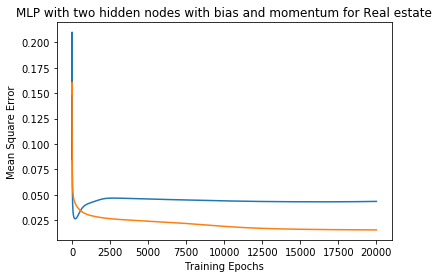

In [137]:
# Print the traget values and the networks predictions
print("Target outputs:", target)
print("Predicted outputs:", predicted_out)

# Set up the plot of the training error by epoch
plt.figure(4)
plt.xlabel('Training Epochs')
plt.ylabel('Mean Square Error')
plt.title('MLP with two hidden nodes with bias and momentum for Real estate')
plt.plot(errorv_log)
plt.plot(error_log)
print(errorv_log, 'blue')
print(errorv_log, 'Red')
plt.draw()

plt.show()  # keeping the plots alive until you close them

### Testing on labelled test data

In [138]:
X_test.shape

(29, 17)

In [139]:
Y_test.shape

(29,)

In [140]:
Z_test= np.array([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]])

In [141]:
X_test = (np.column_stack((Z_test,X_test)))

In [142]:
X_test.shape

(29, 18)

In [143]:
X_test = X_test.T

In [144]:
X_test.shape

(18, 29)

In [145]:
weight_hidden.shape

(100, 18)

In [146]:
predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, np.concatenate(
        (np.ones([1, X_test.shape[1]]), (1 / (1 + np.exp(np.dot(-weight_hidden, X_test)))))))))

In [147]:
Y_test.T

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0])

### Training and Validating again on complete labelled dataset

In [148]:
df1 = pd.read_csv('RealEstateLabelled.csv')

In [149]:
length_wood = len(df1.WBFPSTK)

for y in range(length_wood):
        if df1.WBFPSTK[y] == 'yes':
             df1.WBFPSTK[y] = 1
        else: 
             df1.WBFPSTK[y] = 0
        
print(df1.WBFPSTK) 
print(df1)

0      0
1      0
2      0
3      0
4      0
      ..
185    1
186    0
187    0
188    0
189    0
Name: WBFPSTK, Length: 190, dtype: object
     DWLUN  RDOS  YRBLT  TOTFIXT  HEATING WBFPSTK  BMNTGAR  ATTFRGAR  \
0        1    21   1900        5        2       0        0         0   
1        2     0   1900       10        2       0        0         0   
2        1     1   1959        7        2       0        0         0   
3        2    19   1910       10        2       0        0         0   
4        1    10   1900        8        2       0        0         0   
..     ...   ...    ...      ...      ...     ...      ...       ...   
185      1    15   1955        7        2       1        0         0   
186      1    17   1900        5        2       0        0         0   
187      2    19   1930       12        2       0        0         0   
188      3    20   1885       15        2       0        0         0   
189      1    17   1967        7        2       0        0         

In [150]:
RealEstate = df1.values
RealEstate

array([[1, 21, 1900, ..., 5, 0, 103000],
       [2, 0, 1900, ..., 4, 0, 162000],
       [1, 1, 1959, ..., 4, 420, 160500],
       ...,
       [2, 19, 1930, ..., 4, 0, 200000],
       [3, 20, 1885, ..., 4, 0, 236000],
       [1, 17, 1967, ..., 4, 2770, 155000]], dtype=object)

In [151]:
data_in = RealEstate[:,0:17]

In [152]:
data_in

array([[1, 21, 1900, ..., 0.92, 5, 0],
       [2, 0, 1900, ..., 1.08, 4, 0],
       [1, 1, 1959, ..., 1.0, 4, 420],
       ...,
       [2, 19, 1930, ..., 1.0, 4, 0],
       [3, 20, 1885, ..., 1.08, 4, 0],
       [1, 17, 1967, ..., 1.08, 4, 2770]], dtype=object)

In [153]:
target = RealEstate[:,17] 

In [154]:
length = len(target)

for x in range(length):
    if target[x] >= 170000:
        target[x] = 1
    else: 
        target[x] = 0
        
target = np.array(target, dtype='int32')
print(target)      

[0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1
 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 1 0]


In [155]:
min_max_scaler = preprocessing.MinMaxScaler()
data_in = min_max_scaler.fit_transform(data_in)

In [156]:
Z= np.array([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1]])

In [157]:
Z.shape

(190, 1)

In [158]:
data_in.shape

(190, 17)

In [159]:
data_in = (np.column_stack((Z,data_in)))

In [160]:
data_in.shape

(190, 18)

In [161]:
target.shape

(190,)

In [162]:
X_train, X_val, Y_train, Y_val = train_test_split(data_in, target, test_size=0.15)

In [163]:
X_train.shape

(161, 18)

In [164]:
weight_hidden

array([[-0.37441197,  0.15046796,  0.18892919, ...,  0.06365076,
        -0.27877965,  0.01478299],
       [-0.00577391,  0.03896966,  0.18488312, ..., -0.0343521 ,
         0.06644235,  0.31994041],
       [ 0.50392259, -0.57773425, -0.32850043, ..., -0.17809873,
         0.15743577, -0.54068707],
       ...,
       [ 0.09997225,  0.04982138,  0.30411283, ..., -0.29794397,
         0.04741357, -0.38150526],
       [-0.15567135,  0.03484058, -0.05752257, ..., -0.06631286,
        -0.00337356, -0.20600603],
       [-0.25236842, -0.2669241 ,  0.08639636, ..., -0.35396957,
         0.32418162,  0.0169252 ]])

In [165]:
X_val.shape

(29, 18)

### Getting original random weights to train the model on full data set

In [166]:
# Set the learing parameters
learning_rate = 0.01
momemtum = 0.5
num_epochs = 20000
min_val_loss = np.inf
lamda = 1.8 #lamda variable acts as weight_cost coefficient


# Set the dimensions of the input, hidden, and output layers
size_in = 17
size_hidden = 100  # Can be anything - larger will take longer
size_out = target.ndim

# Set the seed value of the random number generator
random_seed = 2
np.random.seed(random_seed)

# Initialize the network weights, and place to store previous epoch weights
weight_out = np.random.rand(size_out, size_hidden + 1) - 0.5
weight_hidden = np.random.rand(size_hidden, size_in + 1) - 0.5

weight_hidden_prev = np.zeros(weight_hidden.shape)
weight_out_prev = np.zeros(weight_out.shape)

weight_hidden_val = np.zeros(weight_hidden.shape)
weight_out_val = np.zeros(weight_out.shape)

# Initialize a vector to store the train errors for each epoch
error_log = np.zeros([num_epochs])
errorv_log = np.zeros([num_epochs])

print("Outout node initial weights:")
print(weight_out)
print("Hidden node initial weights:")
print(weight_hidden)

Outout node initial weights:
[[-6.40050979e-02 -4.74073768e-01  4.96624779e-02 -6.46776074e-02
  -7.96321979e-02 -1.69665179e-01 -2.95351366e-01  1.19270966e-01
  -2.00345326e-01 -2.33172725e-01  1.21133833e-01  2.91420943e-02
  -3.65420055e-01  1.35781213e-02 -3.15560134e-01  2.85335148e-01
   3.53975293e-01 -5.76316262e-03  3.46561485e-01 -4.20354523e-01
   5.24609012e-03 -4.34713496e-01 -7.18776724e-02 -4.03469084e-01
  -3.72840028e-01  9.67453090e-02 -2.73987999e-01 -3.93054316e-01
  -2.79693793e-01 -1.50173715e-01 -3.22125154e-02 -2.98256774e-01
   1.40406725e-01 -1.69301644e-02  5.23672002e-03 -1.13107349e-01
   2.93637454e-01  8.00041789e-02 -3.37701401e-01  2.00752347e-01
   4.64551080e-01  8.36117022e-06  3.89520064e-01 -1.58386347e-01
   6.71441276e-02 -7.24540367e-02 -6.32527370e-02  2.76559185e-01
   3.56041735e-02  4.53742227e-01  4.42081601e-02 -4.17905078e-01
  -1.33657598e-01  3.50850504e-01 -9.37249570e-02 -4.72797634e-01
  -2.52822761e-01 -4.32855629e-01  4.93852011e-

In [167]:
data_in = X_train

In [168]:
target = Y_train

In [169]:
data_in.shape

(161, 18)

In [170]:
data_in = data_in.T

In [171]:
data_in.shape

(18, 161)

In [172]:
weight_hidden.shape

(100, 18)

In [173]:
X_val.shape

(29, 18)

In [174]:
X_val = X_val.T

In [175]:
X_val.shape

(18, 29)

In [176]:
Y_val.shape

(29,)

In [177]:
for i in range(0, num_epochs):

    # Compute the predicted output for the hidden layer, then adding bias
    predicted_h = 1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))
    predicted_h = np.concatenate((np.ones([1, data_in.shape[1]]), predicted_h), axis=0)
    
    # Compute the output of network
    predicted_out = 1 / (1 + np.exp(np.dot(-weight_out, predicted_h)))
    # print(predicted_out)
    # Compute the derivatives for the weight updates
    deriv_out = (predicted_out * (1 - predicted_out)) * (target - predicted_out)
    deriv_h = (predicted_h * (1 - predicted_h)) * (weight_out.T * deriv_out)

    # Compute the update to the input to hidden node weights
    deriv_weight_h = learning_rate * np.dot(
        data_in, deriv_h[1:].T).T + momemtum * weight_hidden_prev
    weight_hidden = weight_hidden + lamda * deriv_weight_h #using the weight_cost coefficient to minimize the values of weight matrix
    weight_hidden_prev = deriv_weight_h
    
    # Compute the update to the hidden to output node weights
    deriv_weight_out = learning_rate * np.dot(predicted_h, deriv_out.T).T 
    deriv_weight_out = deriv_weight_out + momemtum * weight_out_prev #add momentum
    weight_out = weight_out + lamda * deriv_weight_out 
    weight_out_prev = deriv_weight_out

    # Compute the error (loss) of the network for this epoch  #Change the data_in.shape[1] to X_val and X_test[1] for testing and validation set error 
    predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, np.concatenate(
        (np.ones([1, data_in.shape[1]]), (1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))))))))
    error_log[i] = 0.5 * ((predicted_out_err - target) ** 2).mean(axis=None)
   
    # Computing the mse for validation set
    predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, np.concatenate(
        (np.ones([1, X_val.shape[1]]), (1 / (1 + np.exp(np.dot(-weight_hidden, X_val)))))))))
    errorv_log[i] = 0.5 * ((predicted_out_err - Y_val) ** 2).mean(axis=None) 
    if errorv_log[i] < min_val_loss:
        min_val_loss = errorv_log[i]
        weight_hidden_val = weight_hidden
        weight_out_val = weight_out
    if (i % 50) == 0:
        # print('XOR bias momentum MSE: {0}'.format(error_log[i]))
        print("Iter: %d, Training MSE: %8.7f" % (i, error_log[i]))
        print("Iter: %d, Validation MSE: %8.7f" % (i, errorv_log[i]))

Iter: 0, Training MSE: 0.1396935
Iter: 0, Validation MSE: 0.1375511
Iter: 50, Training MSE: 0.2322843
Iter: 50, Validation MSE: 0.2064204
Iter: 100, Training MSE: 0.0453930
Iter: 100, Validation MSE: 0.0469987
Iter: 150, Training MSE: 0.0399090
Iter: 150, Validation MSE: 0.0490368
Iter: 200, Training MSE: 0.0370193
Iter: 200, Validation MSE: 0.0531705
Iter: 250, Training MSE: 0.0350542
Iter: 250, Validation MSE: 0.0577698
Iter: 300, Training MSE: 0.0335612
Iter: 300, Validation MSE: 0.0617826
Iter: 350, Training MSE: 0.0323724
Iter: 350, Validation MSE: 0.0647929
Iter: 400, Training MSE: 0.0314155
Iter: 400, Validation MSE: 0.0668313
Iter: 450, Training MSE: 0.0306476
Iter: 450, Validation MSE: 0.0681421
Iter: 500, Training MSE: 0.0300339
Iter: 500, Validation MSE: 0.0689763
Iter: 550, Training MSE: 0.0295437
Iter: 550, Validation MSE: 0.0695157
Iter: 600, Training MSE: 0.0291505
Iter: 600, Validation MSE: 0.0698757
Iter: 650, Training MSE: 0.0288324
Iter: 650, Validation MSE: 0.070125

Iter: 5950, Training MSE: 0.0133611
Iter: 5950, Validation MSE: 0.1132828
Iter: 6000, Training MSE: 0.0132781
Iter: 6000, Validation MSE: 0.1132752
Iter: 6050, Training MSE: 0.0131954
Iter: 6050, Validation MSE: 0.1132533
Iter: 6100, Training MSE: 0.0131133
Iter: 6100, Validation MSE: 0.1132187
Iter: 6150, Training MSE: 0.0130317
Iter: 6150, Validation MSE: 0.1131730
Iter: 6200, Training MSE: 0.0129510
Iter: 6200, Validation MSE: 0.1131176
Iter: 6250, Training MSE: 0.0128711
Iter: 6250, Validation MSE: 0.1130540
Iter: 6300, Training MSE: 0.0127922
Iter: 6300, Validation MSE: 0.1129834
Iter: 6350, Training MSE: 0.0127144
Iter: 6350, Validation MSE: 0.1129071
Iter: 6400, Training MSE: 0.0126377
Iter: 6400, Validation MSE: 0.1128263
Iter: 6450, Training MSE: 0.0125622
Iter: 6450, Validation MSE: 0.1127417
Iter: 6500, Training MSE: 0.0124879
Iter: 6500, Validation MSE: 0.1126544
Iter: 6550, Training MSE: 0.0124149
Iter: 6550, Validation MSE: 0.1125650
Iter: 6600, Training MSE: 0.0123433
It

Iter: 11500, Training MSE: 0.0097751
Iter: 11500, Validation MSE: 0.1076579
Iter: 11550, Training MSE: 0.0097692
Iter: 11550, Validation MSE: 0.1076332
Iter: 11600, Training MSE: 0.0097635
Iter: 11600, Validation MSE: 0.1076087
Iter: 11650, Training MSE: 0.0097578
Iter: 11650, Validation MSE: 0.1075846
Iter: 11700, Training MSE: 0.0097523
Iter: 11700, Validation MSE: 0.1075607
Iter: 11750, Training MSE: 0.0097469
Iter: 11750, Validation MSE: 0.1075371
Iter: 11800, Training MSE: 0.0097416
Iter: 11800, Validation MSE: 0.1075138
Iter: 11850, Training MSE: 0.0097365
Iter: 11850, Validation MSE: 0.1074907
Iter: 11900, Training MSE: 0.0097314
Iter: 11900, Validation MSE: 0.1074679
Iter: 11950, Training MSE: 0.0097264
Iter: 11950, Validation MSE: 0.1074453
Iter: 12000, Training MSE: 0.0097215
Iter: 12000, Validation MSE: 0.1074229
Iter: 12050, Training MSE: 0.0097168
Iter: 12050, Validation MSE: 0.1074009
Iter: 12100, Training MSE: 0.0097121
Iter: 12100, Validation MSE: 0.1073790
Iter: 12150,

Iter: 16900, Training MSE: 0.0094896
Iter: 16900, Validation MSE: 0.1060259
Iter: 16950, Training MSE: 0.0094885
Iter: 16950, Validation MSE: 0.1060169
Iter: 17000, Training MSE: 0.0094874
Iter: 17000, Validation MSE: 0.1060079
Iter: 17050, Training MSE: 0.0094863
Iter: 17050, Validation MSE: 0.1059990
Iter: 17100, Training MSE: 0.0094853
Iter: 17100, Validation MSE: 0.1059901
Iter: 17150, Training MSE: 0.0094842
Iter: 17150, Validation MSE: 0.1059813
Iter: 17200, Training MSE: 0.0094832
Iter: 17200, Validation MSE: 0.1059726
Iter: 17250, Training MSE: 0.0094821
Iter: 17250, Validation MSE: 0.1059639
Iter: 17300, Training MSE: 0.0094811
Iter: 17300, Validation MSE: 0.1059553
Iter: 17350, Training MSE: 0.0094801
Iter: 17350, Validation MSE: 0.1059468
Iter: 17400, Training MSE: 0.0094791
Iter: 17400, Validation MSE: 0.1059383
Iter: 17450, Training MSE: 0.0094781
Iter: 17450, Validation MSE: 0.1059299
Iter: 17500, Training MSE: 0.0094771
Iter: 17500, Validation MSE: 0.1059216
Iter: 17550,

In [178]:
minimum = min(errorv_log)
i =np.where(errorv_log == minimum)
print(minimum,"Iter:%d" % i)

0.04685164643312453 Iter:90


In [179]:
weight_out = weight_out_val
weight_hidden = weight_hidden_val
print(weight_out)
print(weight_hidden)

[[ 0.0123669  -0.32064187 -0.13906919 -0.52557872 -0.34271534  0.03476609
  -0.20899122  0.54388938  0.34869546  0.15234627  0.05403824  0.51046554
  -0.86603424 -0.12693552 -0.57091328  0.65127949  0.51339663 -0.41474552
   0.37639205 -0.02454349  0.08111906 -0.16480222 -0.11851338 -0.66600608
  -0.41985758 -0.18033173 -0.68438933 -0.5314442  -0.05020943 -0.74698722
  -0.30338675 -0.08034286  0.32708206 -0.06468542 -0.4377226   0.23153667
   0.79287465  0.66061879 -0.44729586 -0.07726061  0.79606506 -0.17844757
   0.15896003 -0.17993263 -0.24823986  0.01558226  0.29528606  0.22479118
   0.42030308  0.87895096 -0.19100512 -0.73159629 -0.1123741   0.55853913
  -0.42309682 -0.7548037  -0.12911203 -0.28994108  0.55575655  0.31802334
   0.27074044 -0.08189665  0.43087016 -0.55076584  0.15440585  0.28921652
  -0.58790718 -0.7378412   0.7941953  -0.27709574  0.02340871  0.11461865
  -0.60568729 -0.56076943 -0.12240745  0.29991826  0.08082178 -0.27170735
   0.37910987 -0.34432724 -0.24756747 

### Training and Validation over the whole dataset

Target outputs: [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0
 0 1 1 1 0 0 1 0 0 1 1 1 0]
Predicted outputs: [[3.23089940e-03 3.51250755e-02 7.56545354e-05 4.23449519e-09
  1.82401921e-03 2.00489218e-08 3.12774784e-09 9.99997054e-01
  1.00000000e+00 1.16086935e-09 1.80466253e-07 1.69159973e-04
  1.25910279e-05 3.83359819e-02 3.56966295e-08 9.99948791e-01
  9.97996912e-01 9.99660439e-01 9.99987617e-01 5.91903865e-05
  9.99799541e-01 1.00000000e+00 2.55904820e-05 1.39119515e-08
  9.95383838e-01 9.99998115e-01 6.37994736e-09 9.99999995e-01
  9.99999998e-01 2.00518344e-10 9.99878211e-01 3.05773780e-09
  9.96257790e-01 9.93258226e-01 9.99999599e-01 7.70580479e-04
  3.13488474e-03 1.14764559e-06 1.00000000e+00 4.59586796e-09
  2.08086688e-08 

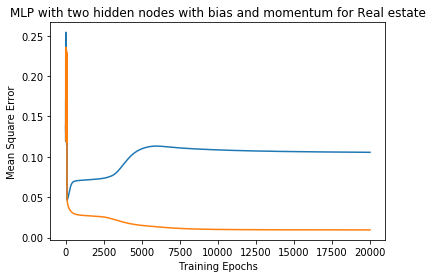

In [180]:
# Print the traget values and the networks predictions
print("Target outputs:", target)
print("Predicted outputs:", predicted_out)

# Set up the plot of the training error by epoch
plt.figure(4)
plt.xlabel('Training Epochs')
plt.ylabel('Mean Square Error')
plt.title('MLP with two hidden nodes with bias and momentum for Real estate')
plt.plot(errorv_log)
plt.plot(error_log)
plt.draw()

plt.show()  # keeping the plots alive until you close them

### Making final predictions of unlabelled dataset

In [181]:
df2 = pd.read_csv('RealEstateUnlabelled.csv')

In [182]:
length_wood = len(df2.WBFPSTK)

for y in range(length_wood):
        if df2.WBFPSTK[y] == 'yes':
             df2.WBFPSTK[y] = 1
        else: 
             df2.WBFPSTK[y] = 0
        
print(df2.WBFPSTK) 
print(df2)

0     1
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
Name: WBFPSTK, dtype: object
    DWLUN  RDOS  YRBLT  TOTFIXT  HEATING WBFPSTK  BMNTGAR  ATTFRGAR  TOTLIVAR  \
0       1     9   1900        5        2       1        0         0      1714   
1       2    20   1890       10        2       0        0         0      1374   
2       1     3   1920        5        2       0        0         0      1396   
3       2    19   1940        8        2       1        0         0      1494   
4       2    15   1900       10        2       0        0         0      3138   
5       2    21   1900       10        2       0        0         0      1750   
6       2     8   1900       10        2       0        0         0      2678   
7       1    15   1893        8        2       0        0         0      1467   
8       2     3   1910    

In [183]:
RealEstate = df2.values

In [184]:
RealEstate.shape

(27, 18)

In [185]:
data_in = RealEstate[:,0:17]

In [186]:
data_in= np.array(data_in, dtype='int32')

In [187]:
data_in.dtype

dtype('int32')

In [188]:
data_in.shape

(27, 17)

In [189]:
Z= np.array([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]])

In [190]:
Z.shape

(27, 1)

In [191]:
data_in = (np.column_stack((Z,data_in)))

In [192]:
data_in.shape

(27, 18)

In [193]:
data_in

array([[   1,    1,    9, 1900,    5,    2,    1,    0,    0, 1714,   98,
           0,    1,    0,    0,    1,    4,    0],
       [   1,    2,   20, 1890,   10,    2,    0,    0,    0, 1374,  115,
           0,    2,    0,    0,    1,    4,    0],
       [   1,    1,    3, 1920,    5,    2,    0,    0,    0, 1396,    0,
         150,    1,    0,    0,    1,    4,    0],
       [   1,    2,   19, 1940,    8,    2,    1,    0,    0, 1494,   60,
         230,    1,    0,    0,    1,    4, 4750],
       [   1,    2,   15, 1900,   10,    2,    0,    0,    0, 3138,  272,
           0,    1,    0,    0,    1,    4,    0],
       [   1,    2,   21, 1900,   10,    2,    0,    0,    0, 1750,  200,
          66,    1,    0,  300,    1,    4,    0],
       [   1,    2,    8, 1900,   10,    2,    0,    0,    0, 2678,  150,
          98,    1,    0,    0,    1,    4,    0],
       [   1,    1,   15, 1893,    8,    2,    0,    0,    0, 1467,  109,
           0,    1,    0,    0,    1,    4,    0],


In [194]:
data_in = data_in.T

In [195]:
data_in.shape

(18, 27)

In [196]:
data_in.dtype

dtype('int32')

In [197]:
predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, np.concatenate(
        (np.ones([1, data_in.shape[1]]), (1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))))))))

In [198]:
result_df = pd.DataFrame(predicted_out_err)

In [199]:
result_df = result_df.T

In [200]:
result_df

,0
0,0.989511
1,0.956423
2,0.967994
3,0.098934
4,0.989897
5,0.989505
6,0.992095
7,0.967994
8,0.992942
9,0.992945


In [201]:
result_df.columns = ['Class']

In [202]:
export_csv = result_df.to_csv ('RealEstateUnlabelled.csv', index = None, header=True) 

In [203]:
for i in range(0, num_epochs):

    # Compute the predicted output for the hidden layer, then adding bias
    predicted_h = 1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))
    predicted_h = np.concatenate((np.ones([1, data_in.shape[1]]), predicted_h), axis=0)
    
    # Compute the output of network
    predicted_out = 1 / (1 + np.exp(np.dot(-weight_out, predicted_h)))
    
print(predicted_out)

[[0.98951063 0.95642282 0.96799418 0.09893357 0.98989735 0.98950475
  0.99209541 0.96799417 0.99294189 0.99294456 0.9639041  0.99436263
  0.09893357 0.98989735 0.63355468 0.95642282 0.99052278 0.19152494
  0.96465824 0.95642282 0.19152494 0.99209538 0.9270853  0.10104004
  0.94775136 0.83898482 0.99838467]]


### Adding one more hidden layer

In [204]:
df2 = pd.read_csv('RealEstateLabelled.csv')

In [205]:
length_wood = len(df2.WBFPSTK)

for y in range(length_wood):
        if df2.WBFPSTK[y] == 'yes':
             df2.WBFPSTK[y] = 1
        else: 
             df2.WBFPSTK[y] = 0
        
print(df2.WBFPSTK) 
print(df2)

0      0
1      0
2      0
3      0
4      0
      ..
185    1
186    0
187    0
188    0
189    0
Name: WBFPSTK, Length: 190, dtype: object
     DWLUN  RDOS  YRBLT  TOTFIXT  HEATING WBFPSTK  BMNTGAR  ATTFRGAR  \
0        1    21   1900        5        2       0        0         0   
1        2     0   1900       10        2       0        0         0   
2        1     1   1959        7        2       0        0         0   
3        2    19   1910       10        2       0        0         0   
4        1    10   1900        8        2       0        0         0   
..     ...   ...    ...      ...      ...     ...      ...       ...   
185      1    15   1955        7        2       1        0         0   
186      1    17   1900        5        2       0        0         0   
187      2    19   1930       12        2       0        0         0   
188      3    20   1885       15        2       0        0         0   
189      1    17   1967        7        2       0        0         

In [206]:
RealEstate = df2.values

In [207]:
RealEstate

array([[1, 21, 1900, ..., 5, 0, 103000],
       [2, 0, 1900, ..., 4, 0, 162000],
       [1, 1, 1959, ..., 4, 420, 160500],
       ...,
       [2, 19, 1930, ..., 4, 0, 200000],
       [3, 20, 1885, ..., 4, 0, 236000],
       [1, 17, 1967, ..., 4, 2770, 155000]], dtype=object)

In [208]:
data_in = RealEstate[:,0:17]

In [209]:
target = RealEstate[:,17]
target

array([103000, 162000, 160500, 170000, 170000, 145000, 182000, 165000,
       240000, 160000, 154000, 151000, 161000, 220000, 202500, 137000,
       135000, 198000, 175000, 160000, 200000, 158000, 125000, 170000,
       205000, 155000, 145000, 250000, 155000, 128000, 128800, 175000,
       170000, 155000, 135000, 180000, 190000, 170000, 205000, 160000,
       178000, 140000, 172000, 175000, 132000, 160000, 136000, 155000,
       155000, 153000, 180000, 139900, 205000, 146000, 146000, 147000,
       155000, 160000, 162000, 175000, 180000, 178000, 130000, 195000,
       185000, 130000, 185000, 162500, 117500, 202500, 150000, 160000,
       145000, 145575, 179900, 142000, 165000, 180000, 212500, 145000,
       140000, 165000, 165000, 165000, 142000, 125000, 157000, 155000,
       166000, 162500, 215000, 170000, 160000, 120000, 206750, 177000,
       172000, 155000, 160000, 155000, 190000, 180000, 173000, 150800,
       125000, 134000, 220000, 140000, 172000, 166666, 206000, 140000,
      

In [210]:
length = len(target)

for x in range(length):
    if target[x] >= 170000:
        target[x] = 1
    else: 
        target[x] = 0
        
target = np.array(target, dtype='int32')
print(target)      

[0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1
 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 1 0]


In [211]:
min_max_scaler = preprocessing.MinMaxScaler()
data_in = min_max_scaler.fit_transform(data_in)

In [212]:
Z= np.array([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],
 [1], [1], [1], [1], [1], [1]])

In [213]:
data_in = (np.column_stack((Z,data_in)))

In [214]:
data_in.shape

(190, 18)

In [215]:
X_train, X_val, Y_train, Y_val = train_test_split(data_in, target, test_size=0.15)

In [216]:
data_in = X_train

In [217]:
target = Y_train

In [218]:
weight_hidden.shape

(100, 18)

In [219]:
data_in = data_in.T

In [220]:
data_in.shape

(18, 161)

In [221]:
# Set the learing parameters
learning_rate = 0.01
momemtum = 0.5
num_epochs = 20000
min_val_loss = np.inf


# Set the dimensions of the input, hidden, and output layers
size_in = 17
size_hidden = 100  # Can be anything - larger will take longer
size_hidden2 = 100
size_out = target.ndim

# Set the seed value of the random number generator
random_seed = 2
np.random.seed(random_seed)

# Initialize the network weights, and place to store previous epoch weights
weight_out = np.random.rand(size_out, size_hidden2 + 1) - 0.5
weight_hidden2 = np.random.rand(size_hidden2, size_hidden + 1) - 0.5
weight_hidden = np.random.rand(size_hidden, size_in + 1) - 0.5

weight_hidden_prev = np.zeros(weight_hidden.shape)
weight_out_prev = np.zeros(weight_out.shape)
weight_hidden2_prev = np.zeros(weight_hidden2.shape)

weight_hidden_val = np.zeros(weight_hidden.shape)
weight_out_val = np.zeros(weight_out.shape)
weight_hidden2_val = np.zeros(weight_hidden2.shape)
# Initialize a vector to store the train errors for each epoch
error_log = np.zeros([num_epochs])
errorv_log = np.zeros([num_epochs])

print("Outout node initial weights:")
print(weight_out)
print("Hidden node initial weights:")
print(weight_hidden)
print("Hidden node 2 initial weights:")
print(weight_hidden2)

Outout node initial weights:
[[-6.40050979e-02 -4.74073768e-01  4.96624779e-02 -6.46776074e-02
  -7.96321979e-02 -1.69665179e-01 -2.95351366e-01  1.19270966e-01
  -2.00345326e-01 -2.33172725e-01  1.21133833e-01  2.91420943e-02
  -3.65420055e-01  1.35781213e-02 -3.15560134e-01  2.85335148e-01
   3.53975293e-01 -5.76316262e-03  3.46561485e-01 -4.20354523e-01
   5.24609012e-03 -4.34713496e-01 -7.18776724e-02 -4.03469084e-01
  -3.72840028e-01  9.67453090e-02 -2.73987999e-01 -3.93054316e-01
  -2.79693793e-01 -1.50173715e-01 -3.22125154e-02 -2.98256774e-01
   1.40406725e-01 -1.69301644e-02  5.23672002e-03 -1.13107349e-01
   2.93637454e-01  8.00041789e-02 -3.37701401e-01  2.00752347e-01
   4.64551080e-01  8.36117022e-06  3.89520064e-01 -1.58386347e-01
   6.71441276e-02 -7.24540367e-02 -6.32527370e-02  2.76559185e-01
   3.56041735e-02  4.53742227e-01  4.42081601e-02 -4.17905078e-01
  -1.33657598e-01  3.50850504e-01 -9.37249570e-02 -4.72797634e-01
  -2.52822761e-01 -4.32855629e-01  4.93852011e-

In [222]:
X_val.shape

(29, 18)

In [223]:
weight_hidden2.shape

(100, 101)

In [224]:
X_val = X_val.T

In [225]:
X_val.shape

(18, 29)

In [226]:
weight_hidden.shape

(100, 18)

In [227]:
Y_val.shape

(29,)

In [228]:
for i in range(0, num_epochs):
    # Compute the predicted output for the hidden layer, then adding bias
    predicted_h = 1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))
    predicted_h = np.concatenate((np.ones([1, data_in.shape[1]]), predicted_h), axis=0)
    
    predicted_h2 = 1 / (1 + np.exp(np.dot(-weight_hidden2, predicted_h)))
    predicted_h2 = np.concatenate((np.ones([1, predicted_h.shape[1]]), predicted_h2), axis=0)
    
    # Compute the predicted output of hidden layer 1 for the hidden layer 2, then adding bias
    predicted_out = 1 / (1 + np.exp(np.dot(-weight_out, predicted_h2)))

    
    # print(predicted_out)
    # Compute the derivatives for the weight updates
    deriv_out = (predicted_out * (1 - predicted_out)) * (target - predicted_out)
    
    deriv_h2 = (predicted_h2 * (1 - predicted_h2)) * (weight_out.T * deriv_out)
    
   
    deriv_h = (predicted_h * (1 - predicted_h)) * np.dot(weight_hidden2.T,deriv_h2[1:])
    
    
        # Compute the update to the input to hidden node weights
    deriv_weight_h = learning_rate * np.dot(
        data_in, deriv_h[1:].T).T + momemtum * weight_hidden_prev
    weight_hidden = weight_hidden + deriv_weight_h
    weight_hidden_prev = deriv_weight_h
    
     # Compute the update to the hidden1 to hidden2 node weights
    deriv_weight_h2 = learning_rate * np.dot(predicted_h, deriv_h2.T).T 
    deriv_weight_h2 = deriv_weight_h2[1:] + momemtum * weight_hidden2_prev #add momentum
    weight_hidden2 = weight_hidden2 + deriv_weight_h2
    weight_hidden2_prev = deriv_weight_h2
    
    
    # Compute the update to the hidden2 to output node weights
    deriv_weight_out = learning_rate * np.dot(predicted_h2, deriv_out.T).T 
    deriv_weight_out = deriv_weight_out + momemtum * weight_out_prev #add momentum
    weight_out = weight_out + deriv_weight_out 
    weight_out_prev = deriv_weight_out

    predicted_h = 1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))
    predicted_h = np.concatenate((np.ones([1, data_in.shape[1]]), predicted_h), axis=0)
    
    # h1 for h2
    predicted_h2 = 1 / (1 + np.exp(np.dot(-weight_hidden2, predicted_h)))
    predicted_h2 = np.concatenate((np.ones([1, predicted_h.shape[1]]), predicted_h2), axis=0)

    # Compute the predicted output of hidden layer 2 for the output, then adding bias
    predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, predicted_h2)))
    
    
    error_log[i] = 0.5 * ((predicted_out_err - target) ** 2).mean(axis=None)
    
    
    ##Validation remaining
    predicted_h = 1 / (1 + np.exp(np.dot(-weight_hidden, X_val)))
    predicted_h = np.concatenate((np.ones([1, X_val.shape[1]]), predicted_h), axis=0)
    
    # h1 for h2
    predicted_h2 = 1 / (1 + np.exp(np.dot(-weight_hidden2, predicted_h)))
    predicted_h2 = np.concatenate((np.ones([1, predicted_h.shape[1]]), predicted_h2), axis=0)

    # Compute the predicted output of hidden layer 2 for the output, then adding bias
    predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, predicted_h2)))
    
    
    errorv_log[i] = 0.5 * ((predicted_out_err - Y_val) ** 2).mean(axis=None) 
    if errorv_log[i] < min_val_loss:
        min_val_loss = errorv_log[i]
        weight_hidden_val = weight_hidden
        weight_out_val = weight_out
    if (i % 50) == 0:
        # print('XOR bias momentum MSE: {0}'.format(error_log[i]))
        print("Iter: %d, Training MSE: %8.7f" % (i, error_log[i]))
        print("Iter: %d, Validation MSE: %8.7f" % (i, errorv_log[i]))
    
    

Iter: 0, Training MSE: 0.1731504
Iter: 0, Validation MSE: 0.1862108
Iter: 50, Training MSE: 0.0510935
Iter: 50, Validation MSE: 0.0494727
Iter: 100, Training MSE: 0.0433430
Iter: 100, Validation MSE: 0.0463951
Iter: 150, Training MSE: 0.0397291
Iter: 150, Validation MSE: 0.0478951
Iter: 200, Training MSE: 0.0372867
Iter: 200, Validation MSE: 0.0511792
Iter: 250, Training MSE: 0.0354981
Iter: 250, Validation MSE: 0.0552746
Iter: 300, Training MSE: 0.0341004
Iter: 300, Validation MSE: 0.0592716
Iter: 350, Training MSE: 0.0329387
Iter: 350, Validation MSE: 0.0627055
Iter: 400, Training MSE: 0.0319451
Iter: 400, Validation MSE: 0.0653370
Iter: 450, Training MSE: 0.0310977
Iter: 450, Validation MSE: 0.0671654
Iter: 500, Training MSE: 0.0303866
Iter: 500, Validation MSE: 0.0683635
Iter: 550, Training MSE: 0.0297999
Iter: 550, Validation MSE: 0.0691383
Iter: 600, Training MSE: 0.0293215
Iter: 600, Validation MSE: 0.0696517
Iter: 650, Training MSE: 0.0289331
Iter: 650, Validation MSE: 0.070009

Iter: 5650, Training MSE: 0.0133064
Iter: 5650, Validation MSE: 0.1187875
Iter: 5700, Training MSE: 0.0132686
Iter: 5700, Validation MSE: 0.1191100
Iter: 5750, Training MSE: 0.0132322
Iter: 5750, Validation MSE: 0.1194303
Iter: 5800, Training MSE: 0.0131971
Iter: 5800, Validation MSE: 0.1197496
Iter: 5850, Training MSE: 0.0131629
Iter: 5850, Validation MSE: 0.1200690
Iter: 5900, Training MSE: 0.0131294
Iter: 5900, Validation MSE: 0.1203900
Iter: 5950, Training MSE: 0.0130961
Iter: 5950, Validation MSE: 0.1207138
Iter: 6000, Training MSE: 0.0130627
Iter: 6000, Validation MSE: 0.1210422
Iter: 6050, Training MSE: 0.0130285
Iter: 6050, Validation MSE: 0.1213766
Iter: 6100, Training MSE: 0.0129927
Iter: 6100, Validation MSE: 0.1217187
Iter: 6150, Training MSE: 0.0129540
Iter: 6150, Validation MSE: 0.1220700
Iter: 6200, Training MSE: 0.0129106
Iter: 6200, Validation MSE: 0.1224310
Iter: 6250, Training MSE: 0.0128599
Iter: 6250, Validation MSE: 0.1228005
Iter: 6300, Training MSE: 0.0127983
It

Iter: 11300, Training MSE: 0.0095665
Iter: 11300, Validation MSE: 0.1250041
Iter: 11350, Training MSE: 0.0095629
Iter: 11350, Validation MSE: 0.1249795
Iter: 11400, Training MSE: 0.0095593
Iter: 11400, Validation MSE: 0.1249550
Iter: 11450, Training MSE: 0.0095559
Iter: 11450, Validation MSE: 0.1249307
Iter: 11500, Training MSE: 0.0095525
Iter: 11500, Validation MSE: 0.1249064
Iter: 11550, Training MSE: 0.0095492
Iter: 11550, Validation MSE: 0.1248822
Iter: 11600, Training MSE: 0.0095459
Iter: 11600, Validation MSE: 0.1248581
Iter: 11650, Training MSE: 0.0095428
Iter: 11650, Validation MSE: 0.1248341
Iter: 11700, Training MSE: 0.0095397
Iter: 11700, Validation MSE: 0.1248102
Iter: 11750, Training MSE: 0.0095367
Iter: 11750, Validation MSE: 0.1247864
Iter: 11800, Training MSE: 0.0095337
Iter: 11800, Validation MSE: 0.1247627
Iter: 11850, Training MSE: 0.0095308
Iter: 11850, Validation MSE: 0.1247392
Iter: 11900, Training MSE: 0.0095280
Iter: 11900, Validation MSE: 0.1247157
Iter: 11950,

Iter: 16750, Validation MSE: 0.1229619
Iter: 16800, Training MSE: 0.0093997
Iter: 16800, Validation MSE: 0.1229482
Iter: 16850, Training MSE: 0.0093991
Iter: 16850, Validation MSE: 0.1229346
Iter: 16900, Training MSE: 0.0093985
Iter: 16900, Validation MSE: 0.1229211
Iter: 16950, Training MSE: 0.0093980
Iter: 16950, Validation MSE: 0.1229077
Iter: 17000, Training MSE: 0.0093974
Iter: 17000, Validation MSE: 0.1228943
Iter: 17050, Training MSE: 0.0093969
Iter: 17050, Validation MSE: 0.1228810
Iter: 17100, Training MSE: 0.0093963
Iter: 17100, Validation MSE: 0.1228677
Iter: 17150, Training MSE: 0.0093958
Iter: 17150, Validation MSE: 0.1228545
Iter: 17200, Training MSE: 0.0093952
Iter: 17200, Validation MSE: 0.1228414
Iter: 17250, Training MSE: 0.0093947
Iter: 17250, Validation MSE: 0.1228283
Iter: 17300, Training MSE: 0.0093942
Iter: 17300, Validation MSE: 0.1228154
Iter: 17350, Training MSE: 0.0093937
Iter: 17350, Validation MSE: 0.1228024
Iter: 17400, Training MSE: 0.0093932
Iter: 17400,

In [229]:
minimum = min(errorv_log)
i =np.where(errorv_log == minimum)
print(minimum,"Iter:%d" % i)

0.04637459112018852 Iter:94


In [230]:
weight_out = weight_out_val
weight_hidden = weight_hidden_val
print(weight_out)
print(weight_hidden)

[[-0.05587262 -0.58877786  0.27398753 -0.07850269  0.0082167   0.06193959
  -0.33069759  0.18360971 -0.18543966 -0.20968077  0.01830144  0.14910212
  -0.70708454 -0.09582646 -0.53923021  0.43867634  0.37645344  0.35590553
   0.4280251  -0.7239686   0.12538324 -0.38861972  0.06108634 -0.43981712
  -0.35594291  0.10603695 -0.39599706 -0.3721225  -0.4649082  -0.47237032
  -0.31368628 -0.51994472  0.15422993 -0.21534859 -0.15733668 -0.28796725
   0.79898428  0.34778073 -0.6015338  -0.03273052  0.59694123 -0.00612983
   0.26689423 -0.18554911 -0.00890278 -0.06793786 -0.06696437  0.20441941
  -0.18791699  0.25780846 -0.01521516 -0.70482483  0.03667846  0.39833725
  -0.2267043  -0.64233495 -0.226262   -0.45003465  0.65270814  0.95997939
   0.76125635  0.02119451  0.17722897 -0.87469961 -0.01474435  0.12827464
  -0.02785111 -0.59576562  0.75637721 -0.02038257 -0.13391828 -0.58382352
  -0.04736062 -0.10484883  0.2681946   0.31963379 -0.01489081 -1.00029095
   0.50998401  0.00482698  0.07299915 

Target outputs: [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0
 0 1 1 1 0 0 1 0 0 1 1 1 0]
Predicted outputs: [[1.62568546e-04 2.61821418e-02 1.16624211e-05 4.32323207e-11
  3.81036506e-04 1.89138412e-09 2.47523499e-11 9.99999973e-01
  1.00000000e+00 2.39906328e-13 9.22012318e-10 3.21441066e-05
  3.80384543e-06 2.61271434e-02 1.24892727e-09 9.99999774e-01
  9.98955432e-01 9.99998563e-01 9.99999944e-01 2.26027207e-06
  9.99997692e-01 1.00000000e+00 4.69039341e-07 4.16864385e-10
  9.98431710e-01 9.99999991e-01 4.31842766e-11 1.00000000e+00
  1.00000000e+00 9.98671199e-13 9.96041299e-01 1.42579845e-12
  9.99983685e-01 9.99307646e-01 9.99999910e-01 4.62045548e-05
  2.93822224e-04 4.56876168e-07 1.00000000e+00 7.58335102e-12
  2.46095016e-10 

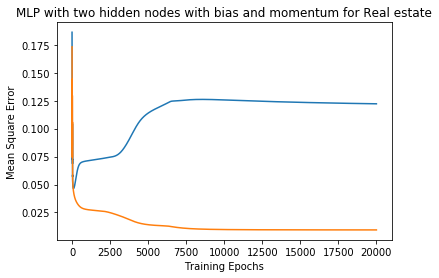

In [231]:
# Print the traget values and the networks predictions
print("Target outputs:", target)
print("Predicted outputs:", predicted_out)

# Set up the plot of the training error by epoch
plt.figure(4)
plt.xlabel('Training Epochs')
plt.ylabel('Mean Square Error')
plt.title('MLP with two hidden nodes with bias and momentum for Real estate')
plt.plot(errorv_log)
plt.plot(error_log)
plt.draw()

plt.show()  # keeping the plots alive until you close them